In [3]:
import numpy as np

class WindyGridworld:
    def __init__(self):
        # Define grid dimensions
        self.rows = 7
        self.cols = 10
        
        # Define the wind strength for each column
        # This is a key feature of the environment
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
        
        # Define start and goal states
        self.start_state = (3, 0)
        self.goal_state = (3, 7)
        
        # Define the actions {0: UP, 1: DOWN, 2: LEFT, 3: RIGHT}
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        
        # The agent's current position, initialized at the start state
        self.current_state = self.start_state

    def reset(self):
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        # If already at the goal, the episode is done
        if self.current_state == self.goal_state:
            return self.current_state, 0, True

        # Get current position
        row, col = self.current_state
        
        # Get the change in position from the action
        dr, dc = self.actions[action]
        
        # Calculate the next state
        # 1. Apply the agent's action
        next_row = row + dr
        next_col = col + dc
        
        # 2. Apply the wind effect from the *current* column
        wind_strength = self.wind[col]
        next_row -= wind_strength
        
        # 3. Apply boundary checks to ensure the agent stays on the grid
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        
        # Update the agent's current state
        self.current_state = (next_row, next_col)
        
        # --- Determine the reward and if the episode is done ---
        reward = -1.0
        done = self.current_state == self.goal_state
        
        return self.current_state, reward, done

In [4]:
# Create an instance of the environment
env = WindyGridworld()

# Reset the environment -> get the starting state
state = env.reset()
print(f"Starting at state: {state}")

# Take few random steps to see how it works 
done = False
total_reward = 0
num_steps = 0

while not done and num_steps < 25:
    # Choose a random action (0, 1, 2, or 3)
    action = np.random.randint(0, 4)
    action_map = {0: "UP", 1: "DOWN", 2: "LEFT", 3: "RIGHT"}
    
    # Take a step in the environment
    next_state, reward, done = env.step(action)
    
    print(f"Step {num_steps+1}: Took action '{action_map[action]}', moved to {next_state}, got reward {reward}")
    
    total_reward += reward
    num_steps += 1

print(f"\nEpisode finished after {num_steps} steps.")
print(f"Total reward: {total_reward}")

if done:
    print("Goal was reached!")
else:
    print("Episode timed out.")

Starting at state: (3, 0)
Step 1: Took action 'DOWN', moved to (4, 0), got reward -1.0
Step 2: Took action 'LEFT', moved to (4, 0), got reward -1.0
Step 3: Took action 'DOWN', moved to (5, 0), got reward -1.0
Step 4: Took action 'UP', moved to (4, 0), got reward -1.0
Step 5: Took action 'DOWN', moved to (5, 0), got reward -1.0
Step 6: Took action 'RIGHT', moved to (5, 1), got reward -1.0
Step 7: Took action 'RIGHT', moved to (5, 2), got reward -1.0
Step 8: Took action 'UP', moved to (4, 2), got reward -1.0
Step 9: Took action 'LEFT', moved to (4, 1), got reward -1.0
Step 10: Took action 'DOWN', moved to (5, 1), got reward -1.0
Step 11: Took action 'UP', moved to (4, 1), got reward -1.0
Step 12: Took action 'DOWN', moved to (5, 1), got reward -1.0
Step 13: Took action 'LEFT', moved to (5, 0), got reward -1.0
Step 14: Took action 'LEFT', moved to (5, 0), got reward -1.0
Step 15: Took action 'RIGHT', moved to (5, 1), got reward -1.0
Step 16: Took action 'LEFT', moved to (5, 0), got reward

Pseudocode: Random Agent Episode

1. Initialize the environment (env).
2. Reset the env to get the start_state.
3. Initialize max_steps to 25.
4. Initialize step_count to 0.
5. Initialize done_flag to false.
6. Loop while done_flag is false AND step_count < max_steps:
    a. action <- Choose a random action from {UP, DOWN, LEFT, RIGHT}.
    b. next_state, reward, done_flag <- env.step(action).
    c. step_count <- step_count + 1.
    d. (Optional) Print the result of the step.
7. End Loop.
8. If done_flag is true:
    a. Print "Goal was reached!".
9. Else:
a. Print "Episode timed out.".

DP Control

1. DP control (Policy Iteration)
Analogy: The "Master Planner" with a perfect map.

Core Idea: If you know all the rules of the world perfectly (you have a model), you can compute the optimal solution without any trial-and-error.

Implementation Logic:

Start: Begin with a completely random policy (a random arrow in every square).

Policy Evaluation (The "What-if"): Assume your current policy is fixed. Calculate the true value of every single square on the grid by sweeping through them repeatedly and applying the Bellman equation. This tells you how good your current plan is.

Policy Improvement (The "Greedy Move"): Look at your newly calculated values. For each square, check if there's a better action you could take (one that leads to a square with a higher value). Update your policy to choose this new, better action.

Loop: Repeat steps 2 and 3 until you go through a full "Policy Improvement" step and your policy doesn't change at all. At this point, it is perfect and optimal.

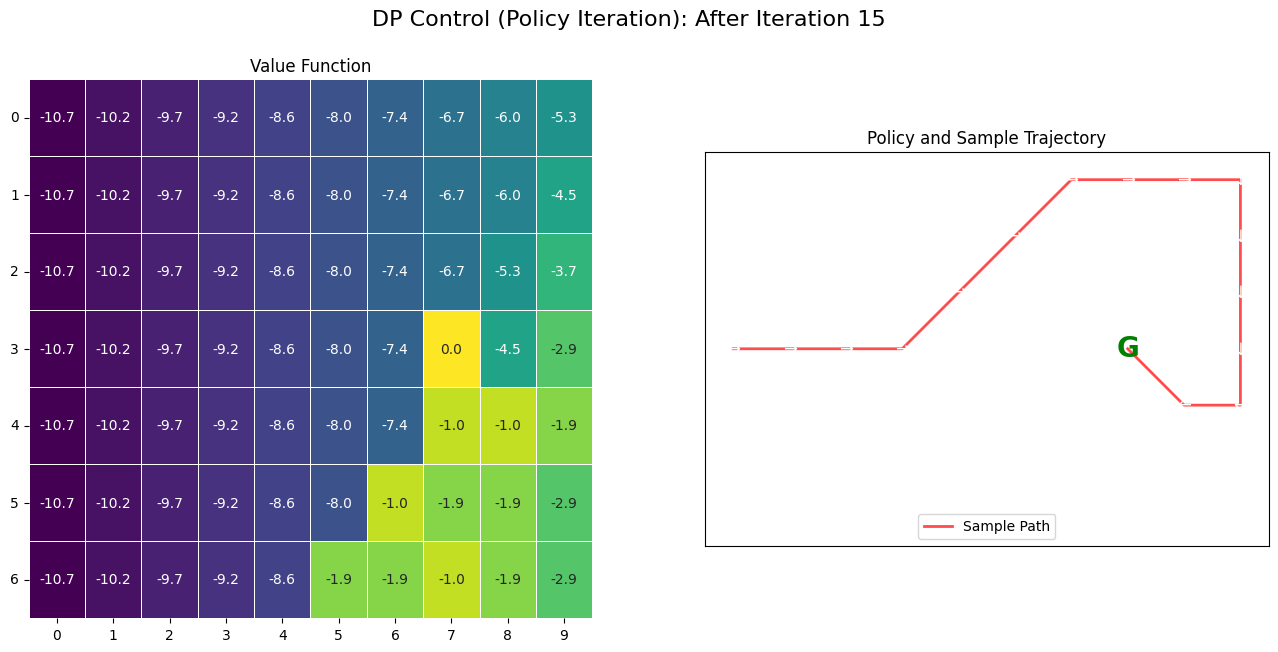


--- Training Complete ---
Final Optimal Policy:


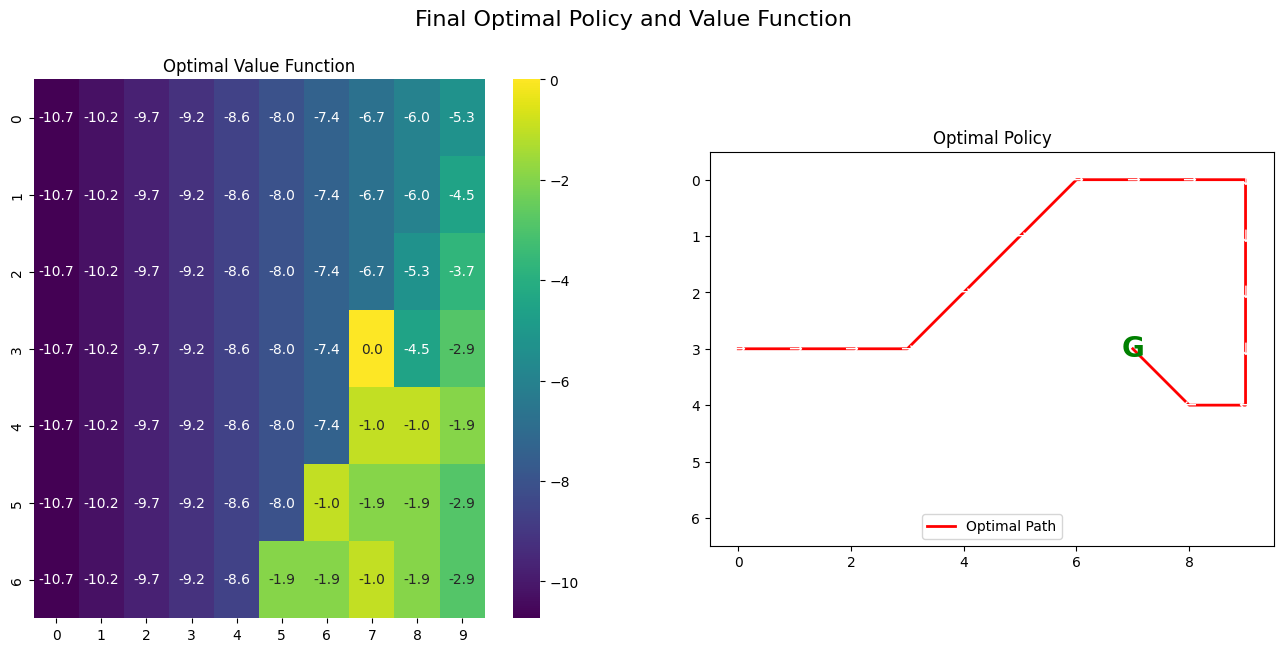

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

# ==============================================================================
# 1. Windy Gridworld Environment
# ==============================================================================

class WindyGridworld:
    """
    Implements the Windy Gridworld environment. Provides a perfect model
    for Dynamic Programming.
    """
    def __init__(self):
        self.rows = 7
        self.cols = 10
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
        self.start_state = (3, 0)
        self.goal_state = (3, 7)
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        self.num_actions = len(self.actions)

    def get_next_state(self, state, action):
        """Calculates the deterministic next state given a state and action."""
        row, col = state
        dr, dc = self.actions[action]
        next_row, next_col = row + dr, col + dc
        next_row -= self.wind[col]
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        return (next_row, next_col)

# ==============================================================================
# 2. Visualization and Trajectory Simulation
# ==============================================================================

def generate_trajectory(policy, env):
    """Simulates one episode following the given policy to show agent behavior."""
    path = []
    state = env.start_state
    path.append(state)
    steps = 0
    while state != env.goal_state and steps < 100:
        action = policy[state]
        state = env.get_next_state(state, action)
        path.append(state)
        steps += 1
    return path

def visualize_dp_iteration(value_function, policy, env, iteration_str):
    """
    Visualizes the DP algorithm's progress: the value function, the current
    policy, and a sample trajectory showing how an agent would behave.
    """
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'DP Control (Policy Iteration): {iteration_str}', fontsize=16)

    # 1. Plot Value Function
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5)
    axes[0].set_title('Value Function')
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    # 2. Plot Policy and a sample trajectory
    trajectory = generate_trajectory(policy, env)
    axes[1].set_title("Policy and Sample Trajectory")
    axes[1].imshow(np.zeros_like(policy, dtype=float), cmap='gray_r')

    # Draw trajectory path
    if len(trajectory) > 1:
        path_rows, path_cols = zip(*trajectory)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.7, label="Sample Path")

    # Draw policy arrows
    for r in range(env.rows):
        for c in range(env.cols):
            if (r, c) == env.goal_state:
                axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
            else:
                action = policy[r, c]
                arrow = env.action_map[action]
                axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)
    
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].legend()

    display(fig)
    plt.close(fig)

# ==============================================================================
# 3. Policy Iteration Algorithm (DP Control)
# ==============================================================================

def policy_iteration(env, gamma=0.95, theta=0.1):
    value_function = np.zeros((env.rows, env.cols))
    policy = np.random.randint(0, env.num_actions, size=(env.rows, env.cols))
    
    plt.ion()
    visualize_dp_iteration(value_function, policy, env, "Initial Random Policy")
    time.sleep(1) # Shortened pause

    iteration = 0
    while True:
        iteration += 1
        
        # Policy Evaluation (Truncated: limited number of sweeps)
        for _ in range(20): # <-- THE MAIN FIX: Limit sweeps to make it fast
            delta = 0
            for r in range(env.rows):
                for c in range(env.cols):
                    if (r, c) == env.goal_state: continue
                    old_v = value_function[r, c]
                    action = policy[r, c]
                    next_state = env.get_next_state((r, c), action)
                    reward = -1
                    value_function[r, c] = reward + gamma * value_function[next_state]
                    delta = max(delta, abs(old_v - value_function[r, c]))
            if delta < theta:
                break
        
        # Policy Improvement
        policy_stable = True
        for r in range(env.rows):
            for c in range(env.cols):
                if (r, c) == env.goal_state: continue
                old_action = policy[r, c]
                action_values = []
                for action in range(env.num_actions):
                    next_state = env.get_next_state((r, c), action)
                    reward = -1
                    action_values.append(reward + gamma * value_function[next_state])
                policy[r, c] = np.argmax(action_values)
                if old_action != policy[r, c]:
                    policy_stable = False
        
        visualize_dp_iteration(value_function, policy, env, f"After Iteration {iteration}")
        time.sleep(0.5) # Shortened pause

        if policy_stable:
            break
            
    plt.ioff()
    return policy, value_function

# ==============================================================================
# 4. Main Execution
# ==============================================================================

if __name__ == '__main__':
    env = WindyGridworld()
    
    print("--- Starting DP Control (Policy Iteration) ---")
    optimal_policy, optimal_value_function = policy_iteration(env)
    
    print("\n--- Training Complete ---")
    print("Final Optimal Policy:")
    final_trajectory = generate_trajectory(optimal_policy, env)
    
    # Final Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Final Optimal Policy and Value Function', fontsize=16)
    sns.heatmap(optimal_value_function, annot=True, fmt=".1f", cmap="viridis", ax=axes[0])
    axes[0].set_title('Optimal Value Function')
    axes[1].imshow(np.zeros_like(optimal_policy, dtype=float), cmap='gray_r')
    path_rows, path_cols = zip(*final_trajectory)
    axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, label="Optimal Path")
    for r in range(env.rows):
        for c in range(env.cols):
            # THE FIX IS HERE: Used 'color' and 'weight' instead of 'c' and 'w'
            if (r,c) == env.goal_state: 
                axes[1].text(c, r, 'G', ha='center', va='center', color='g', size=20, weight='bold')
            else: 
                axes[1].text(c, r, env.action_map[optimal_policy[r,c]], ha='center', va='center', color='w', size=12)
    axes[1].set_title('Optimal Policy')
    axes[1].legend()
    plt.show()



MC on-policy control 

2. MC on-policy control
Analogy: The "Patient Explorer" who learns after each full journey.

Core Idea: You don't have a map. You learn by completing entire trips and then analyzing the outcome of the whole trip.

Implementation Logic:

Generate a Full Episode: The agent follows its current strategy (e.g., ε-greedy) from the start until it reaches the goal. It records every (state, action, reward) tuple along the way.

Calculate the Return: Once the goal is reached, work backward from the end of the episode. For each step t, the return G is the sum of all future rewards from that step to the end.

Update the Q-table: For each state-action pair (S, A) visited in the episode, update its value Q(S, A) by averaging the return G you just calculated with all the previous returns you've ever seen for that pair.

Loop: Repeat for many episodes. The policy (which is based on the Q-table) gets better as the averages become more accurate.

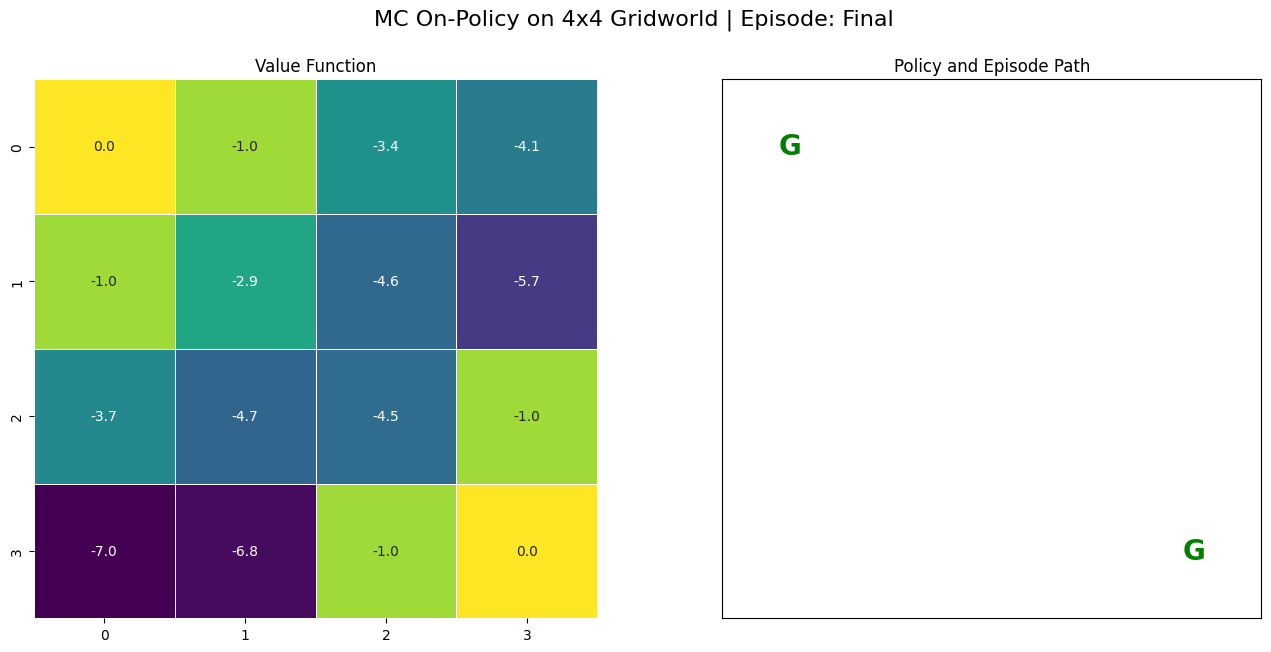

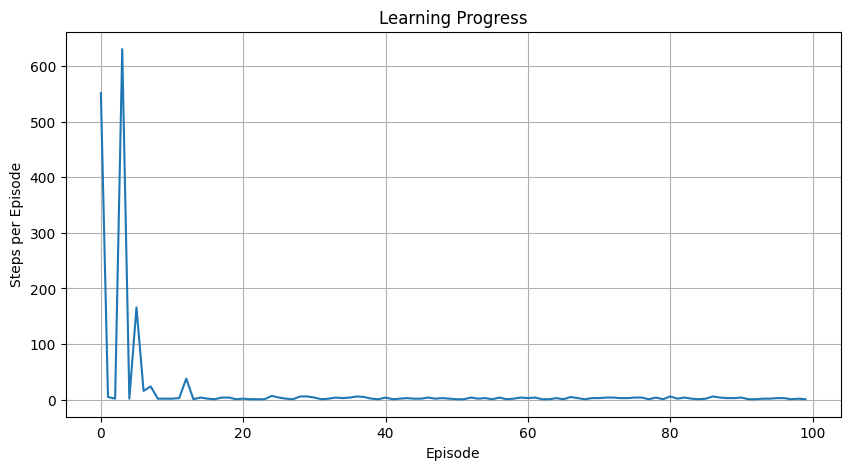

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import collections

# ==============================================================================
# 1. 4x4 Gridworld Environment
# ==============================================================================

class Gridworld_4x4:
    """
    Implements a 4x4 Gridworld environment.
    States are numbered 0-15. Terminal states are 0 and 15.
    Reward is -1 for all transitions.
    """
    def __init__(self):
        self.grid_size = 4
        self.num_states = self.grid_size * self.grid_size
        self.terminal_states = [0, self.num_states - 1]
        
        # Actions: 0=UP, 1=DOWN, 2=LEFT, 3=RIGHT
        self.actions = [0, 1, 2, 3]
        self.num_actions = len(self.actions)
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        
        self.state = None

    def reset(self):
        """Resets the environment, returning a random start state."""
        self.state = np.random.choice([s for s in range(self.num_states) if s not in self.terminal_states])
        return self.state

    def step(self, action):
        """Takes an action and returns (next_state, reward, done)."""
        if self.state in self.terminal_states:
            return self.state, 0, True

        r, c = self.state // self.grid_size, self.state % self.grid_size
        
        if action == 0: # UP
            r = max(0, r - 1)
        elif action == 1: # DOWN
            r = min(self.grid_size - 1, r + 1)
        elif action == 2: # LEFT
            c = max(0, c - 1)
        elif action == 3: # RIGHT
            c = min(self.grid_size - 1, c + 1)
            
        self.state = r * self.grid_size + c
        
        reward = -1
        done = self.state in self.terminal_states
        
        return self.state, reward, done

# ==============================================================================
# 2. MC On-Policy Agent
# ==============================================================================

class MCOnPolicyAgent:
    def __init__(self, num_states, num_actions, gamma=0.95, epsilon=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((num_states, num_actions))
        self.returns = collections.defaultdict(list)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        else:
            return np.argmax(self.q_table[state, :])

    def update_after_episode(self, episode):
        """
        Updates the Q-table using first-visit MC policy evaluation.
        'episode' is a list of (state, action, reward) tuples.
        """
        states, actions, _ = zip(*episode)
        
        G = 0
        for t in range(len(episode) - 1, -1, -1):
            state, action, reward = episode[t]
            G = self.gamma * G + reward
            
            # First-visit MC: only update if it's the first time this state-action pair was visited
            if not (state, action) in zip(states[:t], actions[:t]):
                self.returns[(state, action)].append(G)
                self.q_table[state, action] = np.mean(self.returns[(state, action)])

# ==============================================================================
# 3. Visualization
# ==============================================================================

def visualize_training(agent, env, episode, path):
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'MC On-Policy on 4x4 Gridworld | Episode: {episode}', fontsize=16)

    # Value Function Heatmap
    value_function = np.max(agent.q_table, axis=1).reshape(env.grid_size, env.grid_size)
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5)
    axes[0].set_title('Value Function')

    # Policy and Path
    policy = np.argmax(agent.q_table, axis=1)
    axes[1].set_title("Policy and Episode Path")
    axes[1].imshow(np.zeros_like(value_function), cmap='gray_r')

    for s in range(env.num_states):
        r, c = s // env.grid_size, s % env.grid_size
        if s in env.terminal_states:
            axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
        else:
            arrow = env.action_map[policy[s]]
            axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)

    if path:
        path_coords = [(s % env.grid_size, s // env.grid_size) for s in path]
        path_cols, path_rows = zip(*path_coords)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.7)

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    display(fig)
    plt.close(fig)

# ==============================================================================
# 4. Main Training Loop
# ==============================================================================

if __name__ == '__main__':
    env = Gridworld_4x4()
    agent = MCOnPolicyAgent(env.num_states, env.num_actions)
    
    num_episodes = 100
    steps_per_episode = []
    plt.ion()

    for episode in range(1, num_episodes + 1):
        episode_history = []
        state = env.reset()
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            episode_history.append((state, action, reward))
            state = next_state
        
        agent.update_after_episode(episode_history)
        
        steps_per_episode.append(len(episode_history))
        if episode % 10 == 0: # Update visualization every 10 episodes
             path = [s for s, a, r in episode_history]
             path.append(env.state)
             print(f"Episode {episode}, Steps: {len(episode_history)}")
             visualize_training(agent, env, episode, path)
             time.sleep(0.2)

    plt.ioff()
    print("\n--- Training Complete ---")
    visualize_training(agent, env, "Final", []) # Show final policy
    plt.show()

    # Plot learning progress
    plt.figure(figsize=(10, 5))
    plt.plot(steps_per_episode)
    plt.title("Learning Progress")
    plt.xlabel("Episode")
    plt.ylabel("Steps per Episode")
    plt.grid(True)
    plt.show()



MC Off-Policy Control

3. MC off-policy control
Analogy: The "Cautious Planner" learning by watching the "Bold Explorer".

Core Idea: Learn the single best (greedy) path while behaving in a more random, exploratory way.

Implementation Logic:

Define Two Policies:

Target Policy (Planner): Always be greedy. This is the optimal policy we want to learn.

Behavior Policy (Explorer): Be ε-greedy. This is the policy the agent actually uses to move.

Generate a Full Episode: The agent follows the behavior policy to get to the goal.

Calculate Return and Correction Factor: Work backward from the end of the episode.

Calculate the return G for each step.

Calculate a correction factor, the importance sampling ratio (W). This ratio is P(action|target) / P(action|behavior).

Update Q-table: Update Q(S, A) by averaging the return G, but weigh it by W.

Crucial Detail: If at any point the action the Explorer took is not what the Planner's greedy policy would have done, stop the update process for this episode, because the rest of the path is irrelevant to the optimal plan.

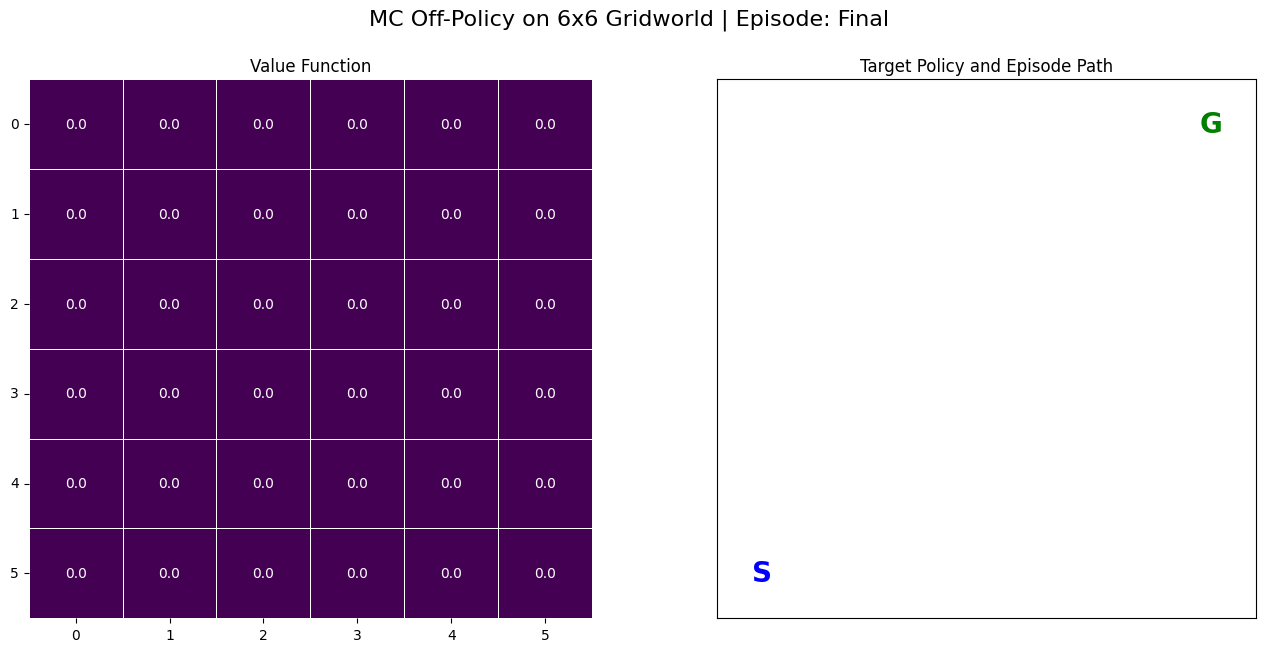

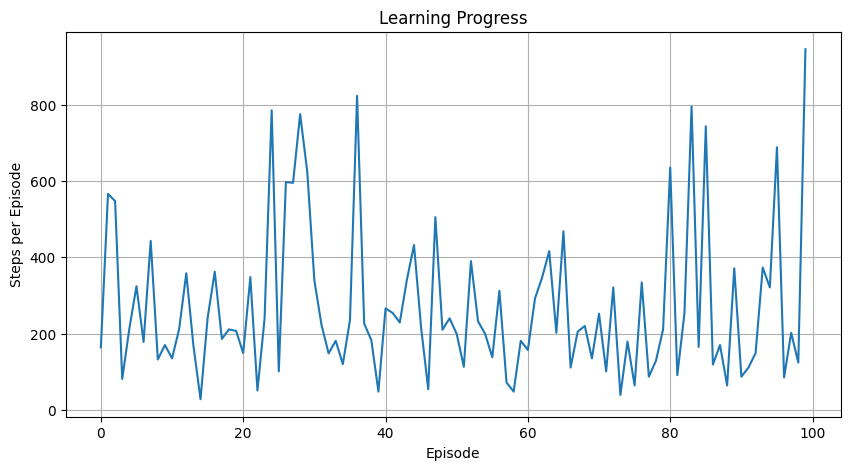

In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import collections

# ==============================================================================
# 1. 6x6 Gridworld Environment
# ==============================================================================

class Gridworld_6x6:
    """
    Implements a 6x6 Gridworld environment.
    """
    def __init__(self):
        self.rows = 6
        self.cols = 6
        self.start_state = (5, 0)  # Bottom-left
        self.goal_state = (0, 5)   # Top-right
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        self.num_actions = len(self.actions)
        self.state = self.start_state

    def reset(self):
        """Resets the environment to the start state."""
        self.state = self.start_state
        return self.state

    def step(self, action):
        """Takes an action and returns the next state, reward, and done flag."""
        row, col = self.state
        dr, dc = self.actions[action]
        
        next_row, next_col = row + dr, col + dc
        
        # Boundary checks
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        
        self.state = (next_row, next_col)
        
        reward = -1
        done = (self.state == self.goal_state)
        
        return self.state, reward, done

# ==============================================================================
# 2. MC Off-Policy Agent
# ==============================================================================

class MCOffPolicyAgent:
    def __init__(self, env, gamma=1.0, epsilon=0.2):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        
        self.q_table = np.zeros((env.rows, env.cols, env.num_actions))
        self.c_table = np.zeros((env.rows, env.cols, env.num_actions))
        self.target_policy = np.zeros((env.rows, env.cols), dtype=int)


    def get_behavior_policy_prob(self, state, action):
        """Returns the probability of an action under the epsilon-greedy behavior policy."""
        row, col = state
        best_action = np.argmax(self.q_table[row, col, :])
        if action == best_action:
            return 1 - self.epsilon + (self.epsilon / self.env.num_actions)
        else:
            return self.epsilon / self.env.num_actions

    def choose_action(self, state): # Behavior Policy
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            row, col = state
            return np.argmax(self.q_table[row, col, :])

    def update_after_episode(self, episode):
        """Updates the Q-table using weighted importance sampling."""
        G = 0.0
        W = 1.0
        for t in range(len(episode) - 1, -1, -1):
            state, action, reward = episode[t]
            row, col = state
            G = self.gamma * G + reward
            
            self.c_table[row, col, action] += W
            
            # Weighted importance sampling update
            self.q_table[row, col, action] += (W / self.c_table[row, col, action]) * (G - self.q_table[row, col, action])
            
            # Update the deterministic target policy for this state
            self.target_policy[row, col] = np.argmax(self.q_table[row, col, :])
            
            # If the action taken is not what the target policy would do, stop learning
            if action != self.target_policy[row, col]:
                break
            
            W = W / self.get_behavior_policy_prob(state, action)


# ==============================================================================
# 3. Visualization
# ==============================================================================

def visualize_training(agent, env, episode, path):
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'MC Off-Policy on 6x6 Gridworld | Episode: {episode}', fontsize=16)

    # Value Function
    value_function = np.max(agent.q_table, axis=2)
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5)
    axes[0].set_title('Value Function')
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    # Policy and Path
    axes[1].set_title("Target Policy and Episode Path")
    axes[1].imshow(np.zeros_like(value_function), cmap='gray_r')
    for r in range(env.rows):
        for c in range(env.cols):
            if (r, c) == env.goal_state:
                axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
            elif (r,c) == env.start_state:
                 axes[1].text(c, r, 'S', ha='center', va='center', color='blue', fontsize=20, weight='bold')
            else:
                arrow = env.action_map[agent.target_policy[r, c]]
                axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)

    if path:
        path_rows, path_cols = zip(*path)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.7)

    axes[1].set_xticks([]); axes[1].set_yticks([])
    display(fig)
    plt.close(fig)

# ==============================================================================
# 4. Main Training Loop
# ==============================================================================

if __name__ == '__main__':
    env = Gridworld_6x6()
    agent = MCOffPolicyAgent(env)
    
    num_episodes = 100
    steps_per_episode = []
    plt.ion()

    for episode in range(1, num_episodes + 1):
        episode_history = []
        state = env.reset()
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            episode_history.append((state, action, reward))
            state = next_state
            
        agent.update_after_episode(episode_history)
        
        steps_per_episode.append(len(episode_history))
        if episode % 10 == 0:
            path = [s for s, a, r in episode_history]
            path.append(env.state)
            print(f"Episode {episode}, Steps: {len(episode_history)}")
            visualize_training(agent, env, episode, path)
            time.sleep(0.2)

    plt.ioff()
    print("\n--- Training Complete ---")
    visualize_training(agent, env, "Final", [])
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(steps_per_episode)
    plt.title("Learning Progress"); plt.xlabel("Episode"); plt.ylabel("Steps per Episode"); plt.grid(True)
    plt.show()



TD(0) on-policy control

4. TD(0) on-policy control (Sarsa)
Analogy: The "Step-by-Step Learner".

Core Idea: Learn after every single step, without waiting for the end of the episode.

Implementation Logic (The Sarsa Quintuple S, A, R, S', A'):

In your current state (S), choose an action (A) using your ε-greedy policy.

Take the action, move to the next state (S'), and get a reward (R).

Look ahead: From S', figure out what your next action (A') will be, again using your ε-greedy policy.

Update: Update the value of the original state-action pair, Q(S, A), using the reward R and the value of the next state-action pair, Q(S', A').

Loop: Repeat this process for every step until the goal is reached.

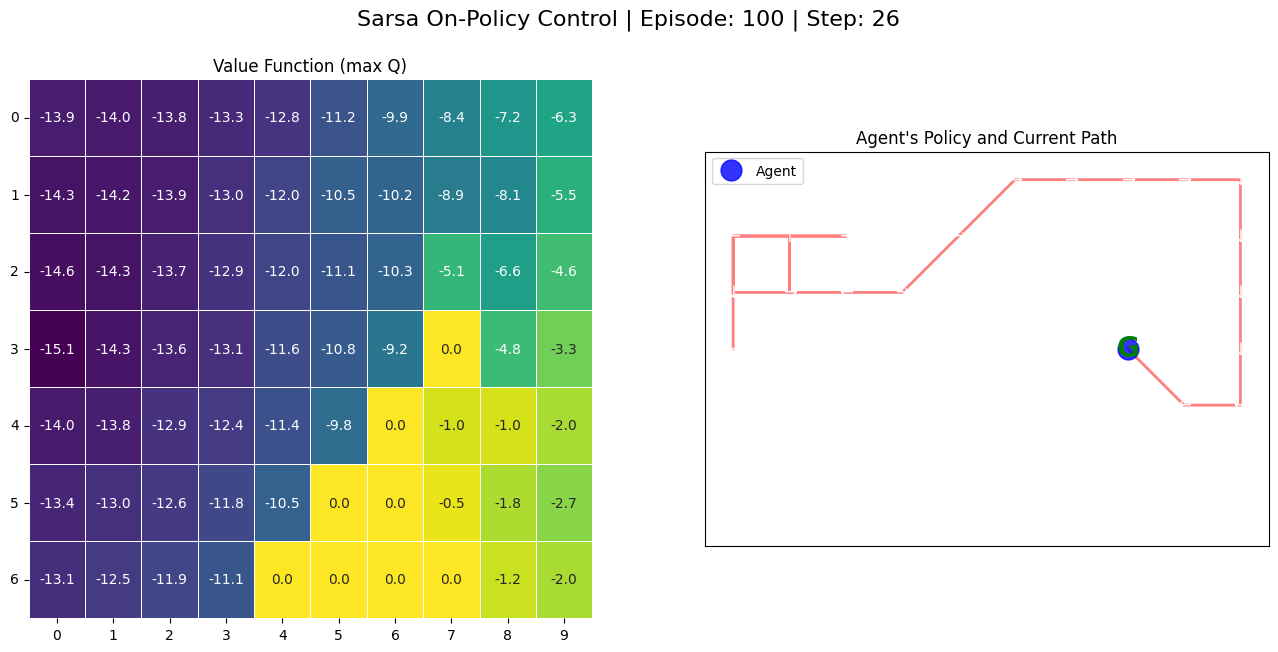

Episode 100 finished in 26 steps.

--- Training Complete ---


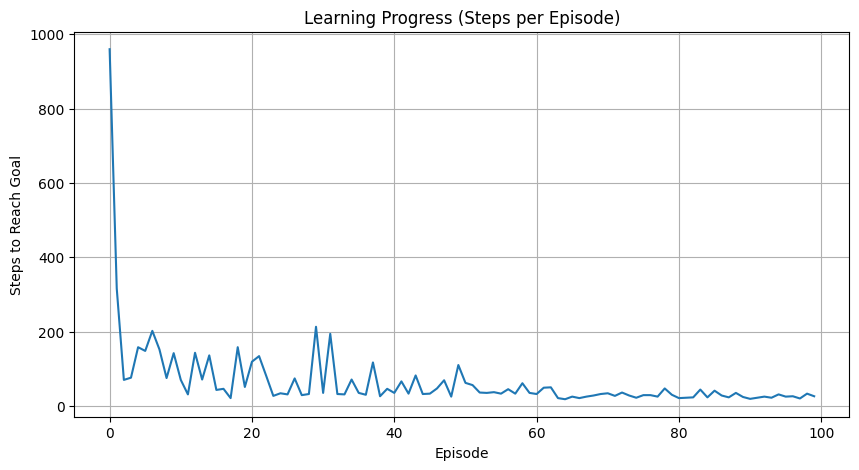

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

# ==============================================================================
# 1. Windy Gridworld Environment
# ==============================================================================

class WindyGridworld:
    """
    Implements the Windy Gridworld environment for a learning agent.
    The agent interacts with this environment using the step() method.
    """
    def __init__(self):
        self.rows = 7
        self.cols = 10
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
        self.start_state = (3, 0)
        self.goal_state = (3, 7)
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        self.num_actions = len(self.actions)
        self.state = self.start_state

    def reset(self):
        """Resets the environment to the start state for a new episode."""
        self.state = self.start_state
        return self.state

    def step(self, action):
        """Takes an action and returns the next state, reward, and done flag."""
        row, col = self.state
        dr, dc = self.actions[action]
        
        next_row, next_col = row + dr, col + dc
        next_row -= self.wind[col]
        
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        
        self.state = (next_row, next_col)
        
        reward = -1
        done = (self.state == self.goal_state)
        
        return self.state, reward, done

# ==============================================================================
# 2. Sarsa (TD(0) On-Policy) Agent
# ==============================================================================

class SarsaAgent:
    """
    Implements the Sarsa (on-policy TD control) algorithm.
    """
    def __init__(self, env, alpha=0.5, gamma=1.0, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.rows, env.cols, env.num_actions))

    def choose_action(self, state):
        """Chooses an action using an epsilon-greedy policy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            row, col = state
            return np.argmax(self.q_table[row, col, :])

    def update(self, state, action, reward, next_state, next_action):
        """Updates the Q-table using the Sarsa update rule."""
        row, col = state
        next_row, next_col = next_state
        
        current_q = self.q_table[row, col, action]
        next_q = self.q_table[next_row, next_col, next_action]
        
        td_target = reward + self.gamma * next_q
        td_error = td_target - current_q
        
        self.q_table[row, col, action] += self.alpha * td_error

# ==============================================================================
# 3. Visualization
# ==============================================================================

def visualize_sarsa_step(agent, env, episode_num, step_num, path, steps_per_episode):
    """Visualizes the agent's learning process in real-time."""
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Sarsa On-Policy Control | Episode: {episode_num} | Step: {step_num}', fontsize=16)

    # 1. Plot Value Function (max Q-value for each state)
    value_function = np.max(agent.q_table, axis=2)
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5)
    axes[0].set_title('Value Function (max Q)')
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    # 2. Plot Agent's View (Policy and Path)
    policy = np.argmax(agent.q_table, axis=2)
    axes[1].set_title("Agent's Policy and Current Path")
    axes[1].imshow(np.zeros_like(policy, dtype=float), cmap='gray_r')
    
    # Draw path
    if len(path) > 1:
        path_rows, path_cols = zip(*path)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.5)

    # Draw policy arrows and agent position
    for r in range(env.rows):
        for c in range(env.cols):
            if (r, c) == env.goal_state:
                axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
            else:
                action = policy[r, c]
                arrow = env.action_map[action]
                axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)

    # Draw agent
    agent_r, agent_c = env.state
    axes[1].plot(agent_c, agent_r, 'bo', markersize=15, alpha=0.8, label="Agent")
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].legend()

    display(fig)
    plt.close(fig)

# ==============================================================================
# 4. Main Training Loop
# ==============================================================================

if __name__ == '__main__':
    env = WindyGridworld()
    agent = SarsaAgent(env)
    
    num_episodes = 100
    visualization_update_rate = 15  # Update visualization every 15 steps for speed
    steps_per_episode = []

    plt.ion()
    
    for episode_num in range(1, num_episodes + 1):
        state = env.reset()
        action = agent.choose_action(state)
        done = False
        step_num = 0
        path = [state]
        
        while not done:
            next_state, reward, done = env.step(action)
            next_action = agent.choose_action(next_state)
            
            agent.update(state, action, reward, next_state, next_action)
            
            state = next_state
            action = next_action
            path.append(state)
            step_num += 1
            
            if step_num % visualization_update_rate == 0 or done:
                visualize_sarsa_step(agent, env, episode_num, step_num, path, steps_per_episode)
        
        steps_per_episode.append(step_num)
        print(f"Episode {episode_num} finished in {step_num} steps.")

    plt.ioff()
    print("\n--- Training Complete ---")

    # Plot learning progress
    plt.figure(figsize=(10, 5))
    plt.plot(steps_per_episode)
    plt.title("Learning Progress (Steps per Episode)")
    plt.xlabel("Episode")
    plt.ylabel("Steps to Reach Goal")
    plt.grid(True)
    plt.show()



TD(0) off-policy control, with unweighted importance sampling

5. TD(0) off-policy control, with unweighted importance sampling
Analogy: The "Planner" watching the "Explorer" and correcting every step with a raw score.

Core Idea: Like Sarsa, learn on every step. Like MC off-policy, learn the optimal policy while behaving more randomly.

Implementation Logic:

In state S, take action A using the behavior policy (ε-greedy).

Observe the next state S' and reward R.

Calculate Importance Sampling Ratio (rho): Calculate the correction factor for the single action A you just took. rho = P(A|target) / P(A|behavior).

Update: Update Q(S, A) using the TD error. The update target is based on the reward R and the value of the best possible next action from S'. Multiply this whole update by rho. If rho is 0 (because the Explorer took a non-greedy action), the update is zero.

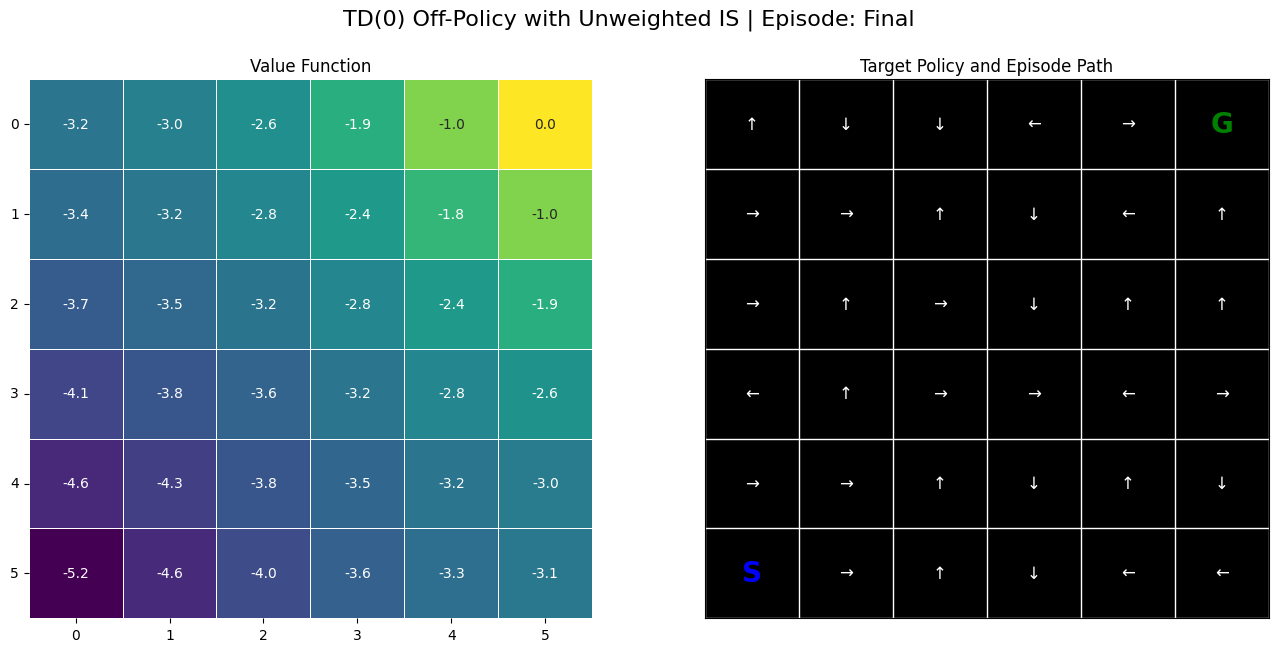

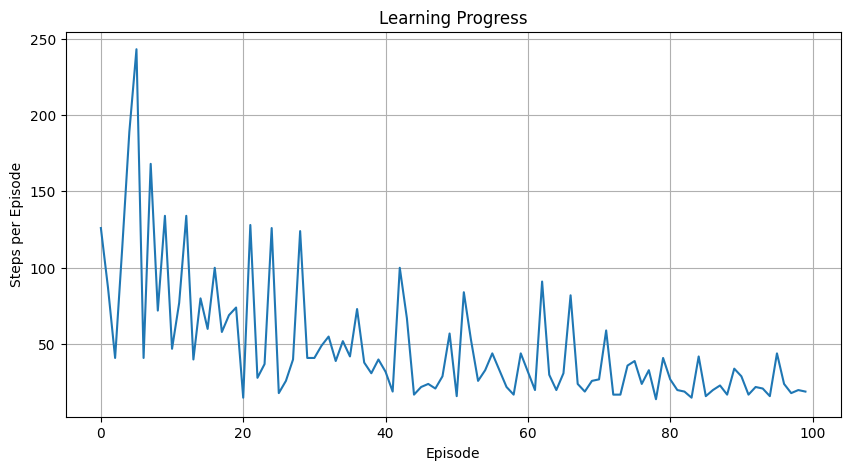

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

# ==============================================================================
# 1. 6x6 Gridworld Environment
# ==============================================================================

class Gridworld_6x6:
    """
    Implements a 6x6 Gridworld environment.
    """
    def __init__(self):
        self.rows = 6
        self.cols = 6
        self.start_state = (5, 0)  # Bottom-left
        self.goal_state = (0, 5)   # Top-right
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        self.num_actions = len(self.actions)
        self.state = self.start_state

    def reset(self):
        """Resets the environment to the start state."""
        self.state = self.start_state
        return self.state

    def step(self, action):
        """Takes an action and returns the next state, reward, and done flag."""
        row, col = self.state
        dr, dc = self.actions[action]
        
        next_row, next_col = row + dr, col + dc
        
        # Boundary checks
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        
        self.state = (next_row, next_col)
        
        reward = -1
        done = (self.state == self.goal_state)
        
        return self.state, reward, done

# ==============================================================================
# 2. TD(0) Off-Policy Agent with Unweighted Importance Sampling
# ==============================================================================

class TDUnweightedISAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.rows, env.cols, env.num_actions))

    def get_target_policy_action(self, state):
        """The target policy is greedy."""
        row, col = state
        return np.argmax(self.q_table[row, col, :])

    def get_behavior_policy_prob(self, state, action):
        """Probability of an action under the epsilon-greedy behavior policy."""
        row, col = state
        best_action = np.argmax(self.q_table[row, col, :])
        if action == best_action:
            return 1 - self.epsilon + (self.epsilon / self.env.num_actions)
        else:
            return self.epsilon / self.env.num_actions

    def choose_action(self, state):
        """The behavior policy is epsilon-greedy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            row, col = state
            return np.argmax(self.q_table[row, col, :])

    def update(self, state, action, reward, next_state):
        """Updates the Q-table using the unweighted importance sampling TD(0) rule."""
        row, col = state
        next_row, next_col = next_state
        
        # Get the action the target policy would have taken in the next state
        next_action_target = self.get_target_policy_action(next_state)
        
        # Calculate the importance sampling ratio (rho)
        target_prob = 1.0 if action == self.get_target_policy_action(state) else 0.0
        behavior_prob = self.get_behavior_policy_prob(state, action)
        rho = target_prob / behavior_prob if behavior_prob > 0 else 0
        
        # TD Target
        next_q = self.q_table[next_row, next_col, next_action_target]
        td_target = reward + self.gamma * next_q
        td_error = td_target - self.q_table[row, col, action]
        
        # Unweighted importance sampling update
        self.q_table[row, col, action] += self.alpha * rho * td_error

# ==============================================================================
# 3. Visualization
# ==============================================================================

def visualize_training(agent, env, episode, path):
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'TD(0) Off-Policy with Unweighted IS | Episode: {episode}', fontsize=16)

    # Value Function
    value_function = np.max(agent.q_table, axis=2)
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5, linecolor='white')
    axes[0].set_title('Value Function')
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    # Policy and Path
    policy = np.argmax(agent.q_table, axis=2)
    axes[1].set_title("Target Policy and Episode Path")
    axes[1].set_facecolor('black')
    axes[1].set_xticks(np.arange(-.5, env.cols, 1), minor=True)
    axes[1].set_yticks(np.arange(-.5, env.rows, 1), minor=True)
    axes[1].grid(which="minor", color="white", linestyle='-', linewidth=1)
    axes[1].tick_params(which="minor", size=0)
    axes[1].tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    axes[1].set_ylim(env.rows - 0.5, -0.5)
    axes[1].set_xlim(-0.5, env.cols - 0.5)

    for r in range(env.rows):
        for c in range(env.cols):
            if (r, c) == env.goal_state:
                axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
            elif (r,c) == env.start_state:
                 axes[1].text(c, r, 'S', ha='center', va='center', color='blue', fontsize=20, weight='bold')
            else:
                arrow = env.action_map[policy[r, c]]
                axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)

    if path:
        path_rows, path_cols = zip(*path)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.7)

    display(fig)
    plt.close(fig)

# ==============================================================================
# 4. Main Training Loop
# ==============================================================================

if __name__ == '__main__':
    env = Gridworld_6x6()
    agent = TDUnweightedISAgent(env)
    
    num_episodes = 100
    steps_per_episode = []
    plt.ion()

    for episode in range(1, num_episodes + 1):
        path = []
        state = env.reset()
        path.append(state)
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            
            agent.update(state, action, reward, next_state)
            
            state = next_state
            path.append(state)
            
        steps_per_episode.append(len(path) - 1)
        if episode % 10 == 0:
            print(f"Episode {episode}, Steps: {len(path) - 1}")
            visualize_training(agent, env, episode, path)
            time.sleep(0.2)

    plt.ioff()
    print("\n--- Training Complete ---")
    visualize_training(agent, env, "Final", [])
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(steps_per_episode)
    plt.title("Learning Progress"); plt.xlabel("Episode"); plt.ylabel("Steps per Episode"); plt.grid(True)
    plt.show()



TD(0)off-policy control, with weighted importance sampling

6. TD(0) off-policy control, with weighted importance sampling
Analogy: The "Prudent Planner" who averages the correction scores over time.

Core Idea: Same as the unweighted version, but with a mechanism to prevent a single lucky (or unlucky) random move from having a huge, destabilizing impact on learning.

Implementation Logic:

Follows the exact same steps as the unweighted version.

Additional Step: Maintain a second table, C(S, A), that keeps a running total of the rho values for every state-action pair.

Modified Update: The update for Q(S, A) is now alpha * (rho / C(S, A)) * td_error. By dividing rho by its cumulative sum, we normalize the update, making it more stable and robust to high-variance events.

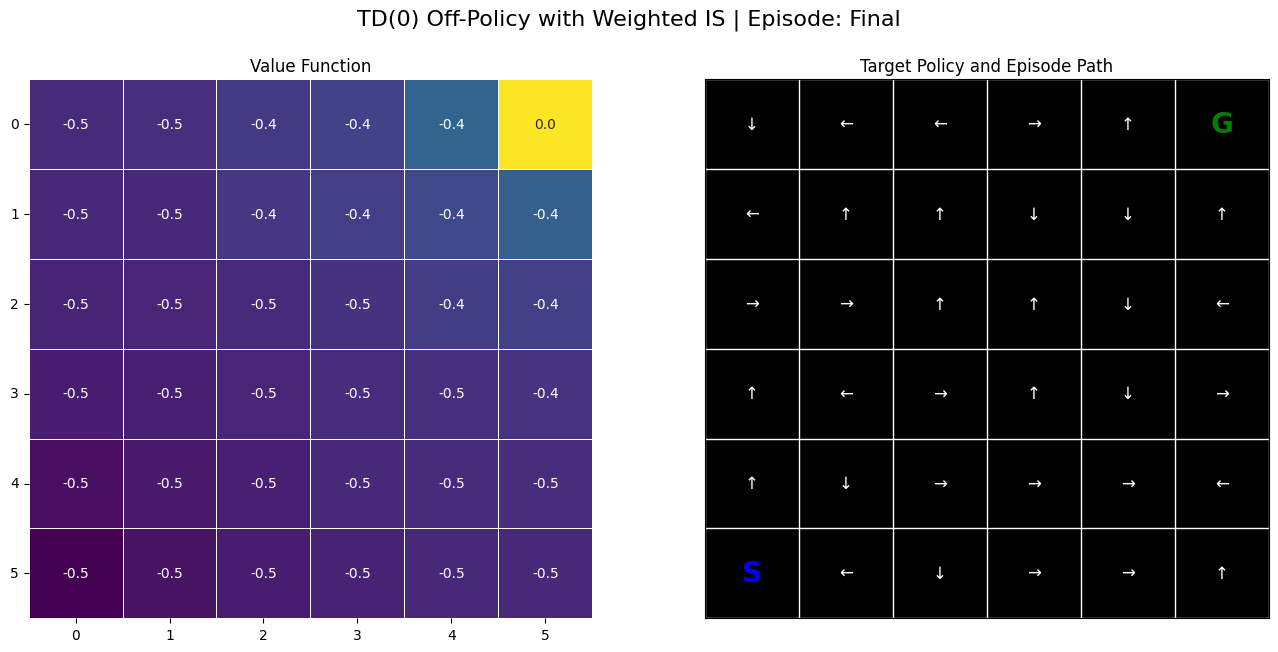

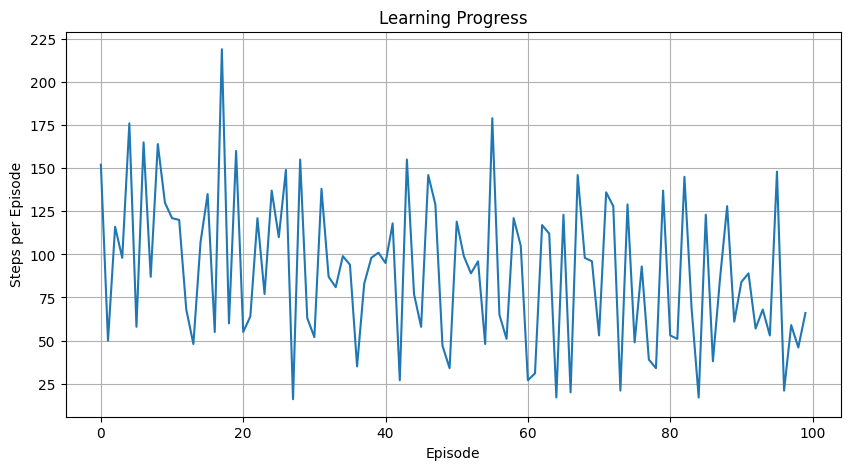

In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

# ==============================================================================
# 1. 6x6 Gridworld Environment
# ==============================================================================

class Gridworld_6x6:
    """
    Implements a 6x6 Gridworld environment.
    """
    def __init__(self):
        self.rows = 6
        self.cols = 6
        self.start_state = (5, 0)  # Bottom-left
        self.goal_state = (0, 5)   # Top-right
        self.actions = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }
        self.action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
        self.num_actions = len(self.actions)
        self.state = self.start_state

    def reset(self):
        """Resets the environment to the start state."""
        self.state = self.start_state
        return self.state

    def step(self, action):
        """Takes an action and returns the next state, reward, and done flag."""
        row, col = self.state
        dr, dc = self.actions[action]
        
        next_row, next_col = row + dr, col + dc
        
        # Boundary checks
        next_row = max(0, min(next_row, self.rows - 1))
        next_col = max(0, min(next_col, self.cols - 1))
        
        self.state = (next_row, next_col)
        
        reward = -1
        done = (self.state == self.goal_state)
        
        return self.state, reward, done

# ==============================================================================
# 2. TD(0) Off-Policy Agent with Weighted Importance Sampling
# ==============================================================================

class TDWeightedISAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.rows, env.cols, env.num_actions))
        # C is the cumulative sum of weights for weighted importance sampling
        self.c_table = np.zeros((env.rows, env.cols, env.num_actions))

    def get_target_policy_action(self, state):
        """The target policy is greedy."""
        row, col = state
        return np.argmax(self.q_table[row, col, :])

    def get_behavior_policy_prob(self, state, action):
        """Probability of an action under the epsilon-greedy behavior policy."""
        row, col = state
        best_action = np.argmax(self.q_table[row, col, :])
        if action == best_action:
            return 1 - self.epsilon + (self.epsilon / self.env.num_actions)
        else:
            return self.epsilon / self.env.num_actions

    def choose_action(self, state):
        """The behavior policy is epsilon-greedy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            row, col = state
            return np.argmax(self.q_table[row, col, :])

    def update(self, state, action, reward, next_state):
        """Updates the Q-table using the weighted importance sampling TD(0) rule."""
        row, col = state
        next_row, next_col = next_state
        
        # Get the action the target policy would have taken in the next state
        next_action_target = self.get_target_policy_action(next_state)
        
        # Calculate the importance sampling ratio (rho)
        target_prob = 1.0 if action == self.get_target_policy_action(state) else 0.0
        behavior_prob = self.get_behavior_policy_prob(state, action)
        rho = target_prob / behavior_prob if behavior_prob > 0 else 0
        
        # Update cumulative weight
        self.c_table[row, col, action] += rho
        
        # TD Target
        next_q = self.q_table[next_row, next_col, next_action_target]
        td_target = reward + self.gamma * next_q
        td_error = td_target - self.q_table[row, col, action]
        
        # Weighted importance sampling update
        if self.c_table[row, col, action] > 0:
            self.q_table[row, col, action] += self.alpha * (rho / self.c_table[row, col, action]) * td_error

# ==============================================================================
# 3. Visualization
# ==============================================================================

def visualize_training(agent, env, episode, path):
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'TD(0) Off-Policy with Weighted IS | Episode: {episode}', fontsize=16)

    # Value Function
    value_function = np.max(agent.q_table, axis=2)
    sns.heatmap(value_function, annot=True, fmt=".1f", cmap="viridis", cbar=False, ax=axes[0], linewidths=.5, linecolor='white')
    axes[0].set_title('Value Function')
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    # Policy and Path
    policy = np.argmax(agent.q_table, axis=2)
    axes[1].set_title("Target Policy and Episode Path")
    axes[1].set_facecolor('black')
    axes[1].set_xticks(np.arange(-.5, env.cols, 1), minor=True)
    axes[1].set_yticks(np.arange(-.5, env.rows, 1), minor=True)
    axes[1].grid(which="minor", color="white", linestyle='-', linewidth=1)
    axes[1].tick_params(which="minor", size=0)
    axes[1].tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    axes[1].set_ylim(env.rows - 0.5, -0.5)
    axes[1].set_xlim(-0.5, env.cols - 0.5)

    for r in range(env.rows):
        for c in range(env.cols):
            if (r, c) == env.goal_state:
                axes[1].text(c, r, 'G', ha='center', va='center', color='green', fontsize=20, weight='bold')
            elif (r,c) == env.start_state:
                 axes[1].text(c, r, 'S', ha='center', va='center', color='blue', fontsize=20, weight='bold')
            else:
                arrow = env.action_map[policy[r, c]]
                axes[1].text(c, r, arrow, ha='center', va='center', color='white', fontsize=12)

    if path:
        path_rows, path_cols = zip(*path)
        axes[1].plot(path_cols, path_rows, 'r-', linewidth=2, alpha=0.7)

    display(fig)
    plt.close(fig)

# ==============================================================================
# 4. Main Training Loop
# ==============================================================================

if __name__ == '__main__':
    env = Gridworld_6x6()
    agent = TDWeightedISAgent(env)
    
    num_episodes = 100
    steps_per_episode = []
    plt.ion()

    for episode in range(1, num_episodes + 1):
        path = []
        state = env.reset()
        path.append(state)
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            
            agent.update(state, action, reward, next_state)
            
            state = next_state
            path.append(state)
            
        steps_per_episode.append(len(path) - 1)
        if episode % 10 == 0:
            print(f"Episode {episode}, Steps: {len(path) - 1}")
            visualize_training(agent, env, episode, path)
            time.sleep(0.2)

    plt.ioff()
    print("\n--- Training Complete ---")
    visualize_training(agent, env, "Final", [])
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(steps_per_episode)
    plt.title("Learning Progress"); plt.xlabel("Episode"); plt.ylabel("Steps per Episode"); plt.grid(True)
    plt.show()

